# 0. Import Data

In [69]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [70]:


import pandas as pd
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv("./seattle-weather.csv")

In [72]:
df.columns


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [73]:
df['date']

0       2012-01-01
1       2012-01-02
2       2012-01-03
3       2012-01-04
4       2012-01-05
           ...    
1456    2015-12-27
1457    2015-12-28
1458    2015-12-29
1459    2015-12-30
1460    2015-12-31
Name: date, Length: 1461, dtype: object

In [74]:
print(df.columns)

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [75]:
X=pd.get_dummies(df.drop(['date','weather'], axis=1))
weather_mapping = {'rain': 0, 'fog': 1, 'sun': 2, 'drizzle': 3 ,'snow': 4}
df['weather'] = df['weather'].map(weather_mapping)

y=df['weather']

In [76]:
X


,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [77]:
y

0       3
1       0
2       0
3       0
4       0
       ..
1456    0
1457    0
1458    1
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64

In [78]:
# X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
# y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [80]:
y_train.head()

192    1
909    0
203    0
123    0
92     2
Name: weather, dtype: int64

# 1. Import Dependencies

In [87]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'X_train' and 'y_train' contain your training features and labels
# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 output neurons for 5 weather types with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Adjust epochs and batch_size

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
y_pred = model.predict(X_test)


Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 1.3132 - accuracy: 0.5353 - val_loss: 0.9223 - val_accuracy: 0.7692
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.7700 - accuracy: 0.7537 - val_loss: 0.7587 - val_accuracy: 0.7778
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.7762 - val_loss: 0.7355 - val_accuracy: 0.7650
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.7730 - val_loss: 0.6678 - val_accuracy: 0.7949
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.7794 - val_loss: 0.6571 - val_accuracy: 0.8077
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7998 - val_loss: 0.6253 - val_accuracy: 0.8034
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.8019 - val_loss: 0.6222 - val_accuracy: 0.8077
Epoch 8/10
30/30 [==

# 2. Build and Compile Model

In [108]:
# find out the max index of each row in y_pred
y_pred = y_pred.argmax(axis=1)

In [110]:
accuracy_score(y_test, y_pred)


0.8191126279863481

# 3. Fit, Predict and Evaluate

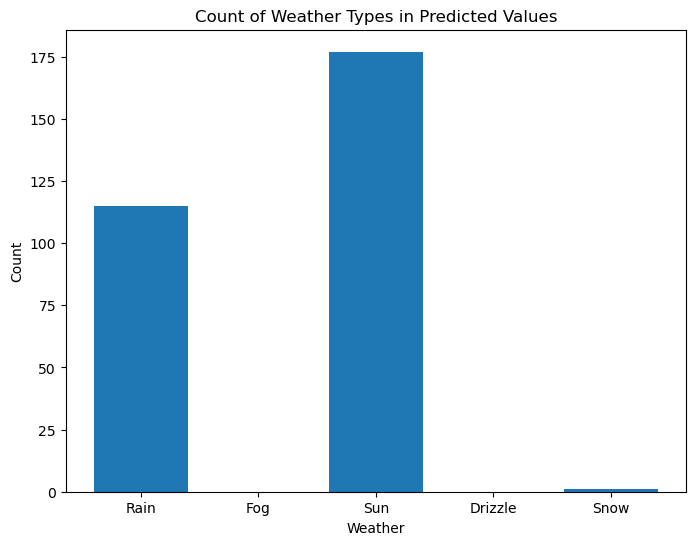

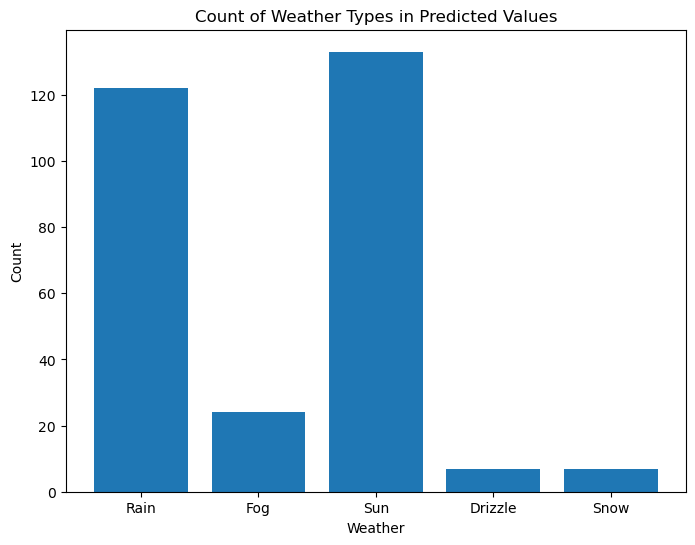

In [112]:
import matplotlib.pyplot as plt

# Replace these with the actual labels used in your dataset
weather_labels = {0: 'Rain', 1: 'Fog', 2: 'Sun', 3: 'Drizzle', 4: 'Snow'}

# Convert numeric predictions back to categorical labels
y_pred_labels = [weather_labels[pred] for pred in y_pred]

# Count occurrences of each weather type
count = {label: y_pred_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()



# Replace these with the actual labels used in your dataset


# Convert numeric predictions back to categorical labels
y_test_labels = [weather_labels[test] for test in y_test]

# Count occurrences of each weather type
count = {label: y_test_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()



In [114]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

# Create Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)  # You can adjust parameters like max_iter
logreg.fit(X_train2, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7918088737201365


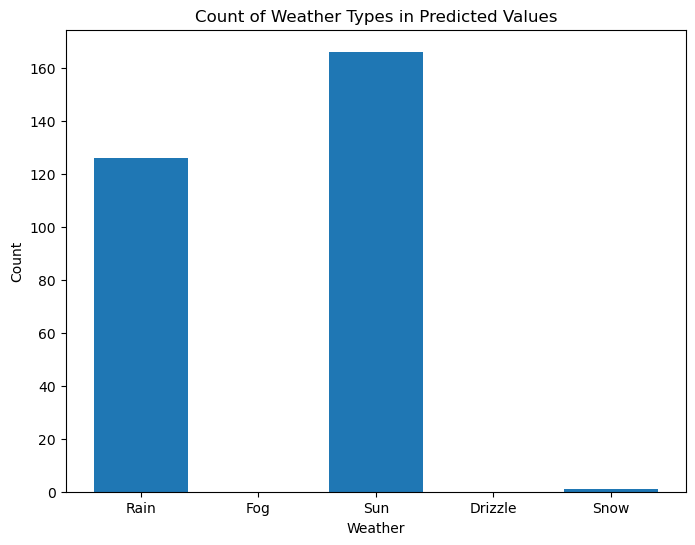

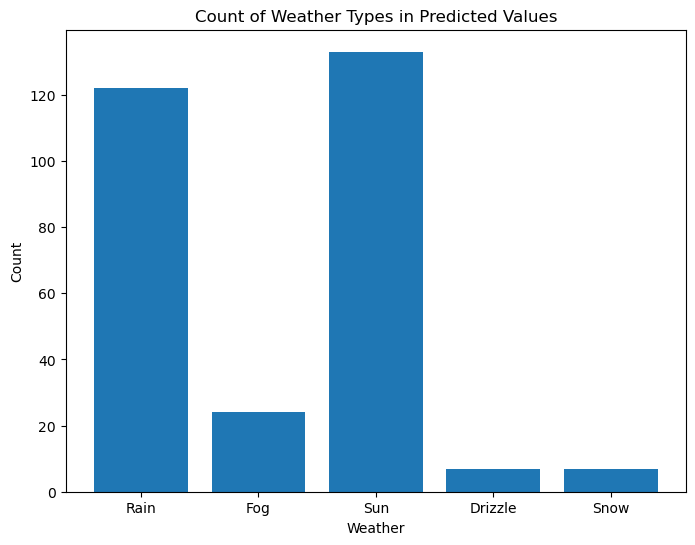

In [115]:
import matplotlib.pyplot as plt

# Replace these with the actual labels used in your dataset
weather_labels = {0: 'Rain', 1: 'Fog', 2: 'Sun', 3: 'Drizzle', 4: 'Snow'}

# Convert numeric predictions back to categorical labels
y_pred_labels = [weather_labels[pred] for pred in y_pred]

# Count occurrences of each weather type
count = {label: y_pred_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()



# Replace these with the actual labels used in your dataset


# Convert numeric predictions back to categorical labels
y_test_labels = [weather_labels[test] for test in y_test]

# Count occurrences of each weather type
count = {label: y_test_labels.count(label) for label in weather_labels.values()}

# Create a bar plot to visualize the count of each weather type in y_pred
plt.figure(figsize=(8, 6))
plt.bar(count.keys(), count.values())
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Types in Predicted Values')
plt.show()





In [122]:

y

0       3
1       0
2       0
3       0
4       0
       ..
1456    0
1457    0
1458    1
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64

0.8054607508532423

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

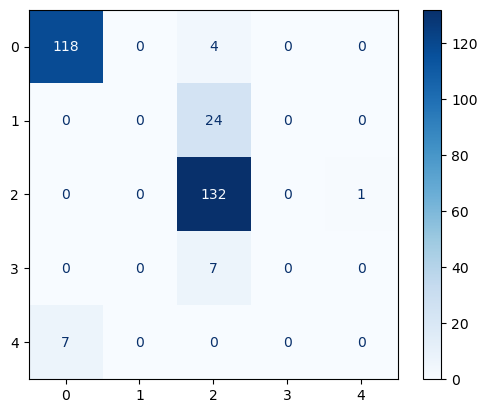

In [402]:
b=accuracy_score(y_test, y_predlr)


In [396]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)




RandomForestClassifier()

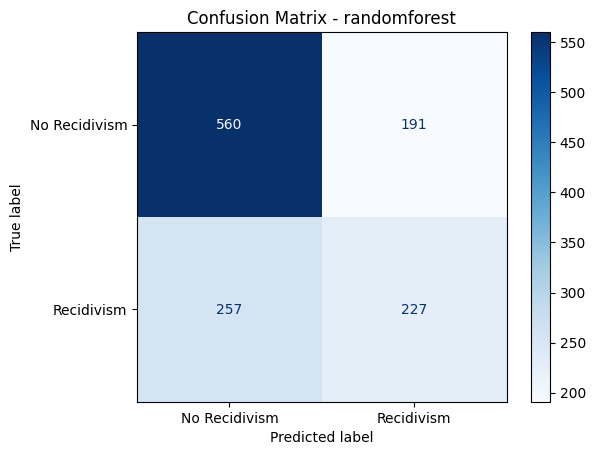

In [397]:
y_pred = rf.predict(X_test)

# Generating the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Recidivism', 'Recidivism'])
disp_nn.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - randomforest')
plt.show()

In [407]:
c=accuracy_score(y_test, y_pred)

0.6639676113360324

In [410]:
model_names = ['Sequential', 'Logistic Regression', 'randomforest']


accuracy_values = [a, b, c] 

In [411]:
accuracy_values

[0.6639676113360324, 0.6607287449392713, 0.637246963562753]

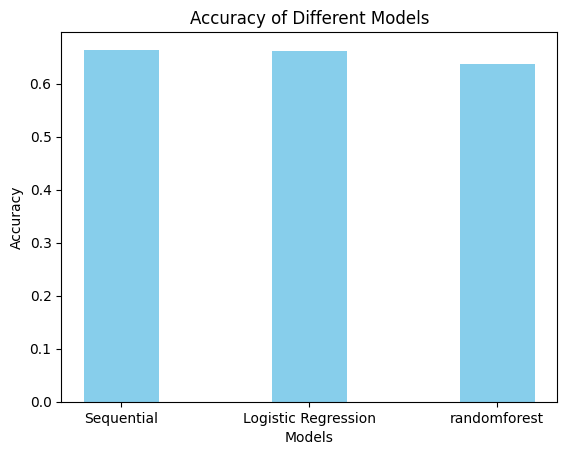

In [414]:
plt.bar(model_names, accuracy_values, color ='skyblue', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [6]:
pip install tensorflow==2.2.1 

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.2.1


In [ ]:
pip install tensorflowjs

In [ ]:
from tensorflowjs import tfjs

# 4. Saving and Reloading

In [ ]:
model.save('tfmodel')

In [213]:
del model 

In [142]:
model = load_model('tfmodel')